In [928]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/mental-heath-in-tech-2016_20161114.csv')
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


## These column headers are gross, and we're only going to look at a few of them...

In [929]:
data = np.array([df['What is your age?'],
        df['What is your gender?'],
        df['What country do you live in?'],
        df['What country do you work in?'],
        df['How many employees does your company or organization have?'],
        df['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'],
        df['Do you have a family history of mental illness?'],
        df['Have you had a mental health disorder in the past?'],
        df['Do you currently have a mental health disorder?'],
        df['Have you ever sought treatment for a mental health issue from a mental health professional?'],
        df['Do you work remotely?']
       ])

columns= ['age',
         'gender',
         'residence_location',
         'work_location',
         'num_employees',
         'employer_awareness',
         'family_history',
         'past_history',
         'current_state',
         'treatment',
         'remote']


In [930]:
df = pd.DataFrame(data=data)
df = df.T # transpose because lists are horizontal
df.columns = columns
df

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote
0,39,Male,United Kingdom,United Kingdom,26-100,No,No,Yes,No,0,Sometimes
1,29,male,United States of America,United States of America,6-25,Yes,Yes,Yes,Yes,1,Never
2,38,Male,United Kingdom,United Kingdom,6-25,No,No,Maybe,No,1,Always
3,43,male,United Kingdom,United Kingdom,NaN,NaN,No,Yes,Yes,1,Sometimes
4,43,Female,United States of America,United States of America,6-25,No,Yes,Yes,Yes,1,Sometimes
5,42,Male,United Kingdom,United Kingdom,More than 1000,No,No,No,Yes,1,Sometimes
6,30,M,United States of America,United States of America,26-100,No,No,No,No,0,Sometimes
7,37,female,United States of America,United States of America,More than 1000,No,Yes,Yes,Yes,1,Always
8,44,Female,United States of America,United States of America,26-100,No,Yes,Yes,Yes,1,Sometimes
9,30,Male,United States of America,United States of America,NaN,NaN,Yes,Yes,Yes,1,Always


In [931]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 11 columns):
age                   1433 non-null object
gender                1430 non-null object
residence_location    1433 non-null object
work_location         1433 non-null object
num_employees         1146 non-null object
employer_awareness    1146 non-null object
family_history        1433 non-null object
past_history          1433 non-null object
current_state         1433 non-null object
treatment             1433 non-null object
remote                1433 non-null object
dtypes: object(11)
memory usage: 123.2+ KB


,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote
count,1433,1430,1433,1433,1146,1146,1433,1433,1433,1433,1433
unique,53,70,53,53,6,3,3,3,3,2,3
top,30,Male,United States of America,United States of America,26-100,No,Yes,Yes,Yes,1,Sometimes
freq,94,610,840,851,292,813,670,736,575,839,757


# Clean things up a bit

### Age

In [932]:
# lets check for any wonky entries in age
df[df.age.apply(lambda x: type(x)!=np.int64)]

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote


good all numbers

In [933]:
# casting as an int
df.age = df.age.astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 11 columns):
age                   1433 non-null int64
gender                1430 non-null object
residence_location    1433 non-null object
work_location         1433 non-null object
num_employees         1146 non-null object
employer_awareness    1146 non-null object
family_history        1433 non-null object
past_history          1433 non-null object
current_state         1433 non-null object
treatment             1433 non-null object
remote                1433 non-null object
dtypes: int64(1), object(10)
memory usage: 123.2+ KB


In [934]:
df.age.describe()

count    1433.000000
mean       34.286113
std        11.290931
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: age, dtype: float64

Looks like there a few weirdos.  I doubt a 3 yo participated in this survey, and I'm pretty sure no one is actually 323.  Lets restrict the ages from 18 - 65.

In [935]:
df.drop(df[(df.age<16) | (df.age > 65)].index, inplace=True)
df.describe()

,age
count,1426.000000
mean,33.998597
std,7.933407
min,17.000000
25%,28.000000
50%,33.000000
75%,38.000000
max,65.000000


Much better.

### Gender
lets look at the gender field

In [936]:
df.gender.describe()

count     1423
unique      68
top       Male
freq       607
Name: gender, dtype: object

wow 70 unique types.  Okay, I support that.  Lets take a look

In [937]:
set(df.gender)

{nan,
 'Unicorn',
 'Androgynous',
 'Agender',
 'Man',
 'I identify as female.',
 'genderqueer woman',
 'mtf',
 'Cis female ',
 'Malr',
 'female',
 'M',
 'Male',
 'cisdude',
 'cis man',
 'male',
 'human',
 'genderqueer',
 'Genderfluid (born female)',
 'Woman',
 'Dude',
 'non-binary',
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
 'mail',
 'Queer',
 'MALE',
 'Female ',
 'female/woman',
 'female ',
 'Cisgender Female',
 'm',
 'Male.',
 'Cis-woman',
 'Genderqueer',
 'Male/genderqueer',
 'Transgender woman',
 'Male ',
 'Male (cis)',
 'Other/Transfeminine',
 'Sex is male',
 'woman',
 'fem',
 'none of your business',
 'Male (trans, FtM)',
 'Genderflux demi-girl',
 'Female or Multi-Gender Femme',
 'Female assigned at birth ',
 'Transitioned, M2F',
 'Cis Male',
 'AFAB',
 'Nonbinary',
 'Fluid',
 'Genderfluid',
 'Enby',
 'Cis male',
 'Female (props for making this a freeform field, 

Wow.  Okay that's great. Lets order it, hopefully something useful will appear.

In [938]:
df.groupby('gender').count().sort_values(by='age', ascending=False)

,age,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote
gender,,,,,,,,,,
Male,607,607,607,502,502,607,607,607,607,607
male,247,247,247,194,194,247,247,247,247,247
Female,153,153,153,121,121,153,153,153,153,153
female,95,95,95,79,79,95,95,95,95,95
M,86,86,86,69,69,86,86,86,86,86
m,79,79,79,56,56,79,79,79,79,79
F,38,38,38,24,24,38,38,38,38,38
f,23,23,23,20,20,23,23,23,23,23
Male,11,11,11,5,5,11,11,11,11,11


okay lets take [Male,male,M,m] [Female,female,F,f] to male female, and drop everything else... sorry I support you, but this will make things WAY simpler

In [939]:
# replace varieties of male and female to 0 and 1
df.gender.replace(to_replace=['Male', 'M', 'male', 'm'], value='Male', inplace=True)
df.gender.replace(to_replace=['Female', 'F', 'female', 'f'], value='Female', inplace=True)

# remove all other observations (sorry ya'll)
df = df[df.gender.isin(['Male','Female'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1431
Data columns (total 11 columns):
age                   1328 non-null int64
gender                1328 non-null object
residence_location    1328 non-null object
work_location         1328 non-null object
num_employees         1065 non-null object
employer_awareness    1065 non-null object
family_history        1328 non-null object
past_history          1328 non-null object
current_state         1328 non-null object
treatment             1328 non-null object
remote                1328 non-null object
dtypes: int64(1), object(10)
memory usage: 124.5+ KB


### number of employees

looks like there some missing data for number of employees

It would be sort of difficult to impute that from the other attributes, so we'll just drop those instances

In [940]:
df.dropna(subset=['num_employees'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 0 to 1431
Data columns (total 11 columns):
age                   1065 non-null int64
gender                1065 non-null object
residence_location    1065 non-null object
work_location         1065 non-null object
num_employees         1065 non-null object
employer_awareness    1065 non-null object
family_history        1065 non-null object
past_history          1065 non-null object
current_state         1065 non-null object
treatment             1065 non-null object
remote                1065 non-null object
dtypes: int64(1), object(10)
memory usage: 99.8+ KB


What do you know?  That took care of the null 'employer_awareness' field too.

In [941]:
df.head()

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote
0,39,Male,United Kingdom,United Kingdom,26-100,No,No,Yes,No,0,Sometimes
1,29,Male,United States of America,United States of America,6-25,Yes,Yes,Yes,Yes,1,Never
4,43,Female,United States of America,United States of America,6-25,No,Yes,Yes,Yes,1,Sometimes
5,42,Male,United Kingdom,United Kingdom,More than 1000,No,No,No,Yes,1,Sometimes
6,30,Male,United States of America,United States of America,26-100,No,No,No,No,0,Sometimes


Lets make the range in num_employees a little more usable

In [943]:
set(df.num_employees)

{'1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000'}

In [944]:
df.num_employees.replace(to_replace=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
               value=['very small', 'small', 'medium', 'large', 'very large', 'giant'],
               inplace=True)

In [945]:
df.groupby('num_employees').count()

,age,gender,residence_location,work_location,employer_awareness,family_history,past_history,current_state,treatment,remote
num_employees,,,,,,,,,,
giant,238,238,238,238,238,238,238,238,238,238
large,233,233,233,233,233,233,233,233,233,233
medium,271,271,271,271,271,271,271,271,271,271
small,195,195,195,195,195,195,195,195,195,195
very large,73,73,73,73,73,73,73,73,73,73
very small,55,55,55,55,55,55,55,55,55,55


### recast treatment

In [895]:
df.treatment = df.treatment.astype(bool)

## Let's Check it out

In [771]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 0 to 1431
Data columns (total 11 columns):
age                   1065 non-null int64
gender                1065 non-null object
residence_location    1065 non-null object
work_location         1065 non-null object
num_employees         1065 non-null object
employer_awareness    1065 non-null object
family_history        1065 non-null object
past_history          1065 non-null object
current_state         1065 non-null object
treatment             1065 non-null bool
remote                1065 non-null object
dtypes: bool(1), int64(1), object(9)
memory usage: 92.6+ KB


In [772]:
df

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote
0,39,Male,United Kingdom,United Kingdom,26-100,No,No,Yes,No,False,Sometimes
1,29,Male,United States of America,United States of America,6-25,Yes,Yes,Yes,Yes,True,Never
4,43,Female,United States of America,United States of America,6-25,No,Yes,Yes,Yes,True,Sometimes
5,42,Male,United Kingdom,United Kingdom,More than 1000,No,No,No,Yes,True,Sometimes
6,30,Male,United States of America,United States of America,26-100,No,No,No,No,False,Sometimes
7,37,Female,United States of America,United States of America,More than 1000,No,Yes,Yes,Yes,True,Always
8,44,Female,United States of America,United States of America,26-100,No,Yes,Yes,Yes,True,Sometimes
10,28,Male,United States of America,United States of America,26-100,Yes,I don't know,Yes,Yes,True,Never
11,34,Male,United States of America,United States of America,100-500,No,Yes,Yes,Yes,True,Sometimes
12,30,Female,United States of America,United States of America,100-500,No,Yes,Yes,Yes,True,Always


# NICE!

# Data Viz

In [773]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

## Age

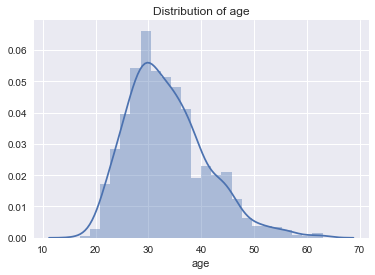

In [774]:
map = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.age)
plt.title('Distribution of age')

It almost looks like there is a bimodal distribution, but I think that could probably be explained away from the fact that there appear to be very few people who are ~33 for some reason.  Also the kernel density looks roughly normal.  So we'll say that it's roughly normal.

Lets see what the age distribution is for people reporting that they currently have a mental illness

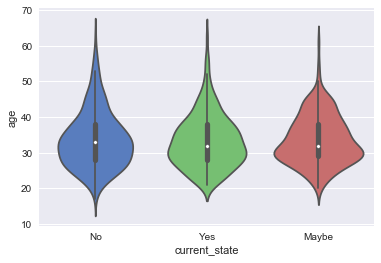

In [823]:
ax = sns.violinplot(x='current_state',y='age',
                    data=df, palette="muted",inner='box')

The age distributions for each response are pretty much the same.  In addition they're all rellatively flat, indicating that age might not be a very good indicator for current state.

It might make sense to look at different stages of peoples careers--early, middle, late.

In [775]:
df['career_stage'] = pd.cut(df.age, bins=[0,30,45,65], labels=['rookie','middle','veteran'])

group_stage = df.groupby('career_stage')
group_stage.size()

career_stage
middle     566
rookie     427
veteran     72
dtype: int64

Not too many in the 'veteran' category, but still enough to get some meaning probably

Lets see how each group reports having mental illness, either in the past or present

career_stage  past_history
middle        Maybe           100
              No              187
              Yes             279
rookie        Maybe            67
              No              156
              Yes             204
veteran       Maybe             8
              No               22
              Yes              42
dtype: int64


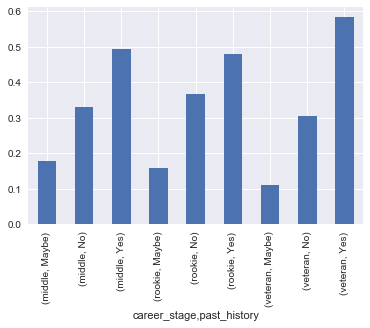

In [776]:
group_stage_history = df.groupby(['career_stage', 'past_history'])
print(group_stage_history.size())
past_percentage = group_stage_history.size() / group_stage.size()
past_percentage.plot(kind='bar')


**Todo** stack that

Looks like the break down is essentially the same across all categories

Lets look at current state

career_stage  current_state
middle        Maybe            135
              No               220
              Yes              211
rookie        Maybe             96
              No               164
              Yes              167
veteran       Maybe             10
              No                38
              Yes               24
dtype: int64


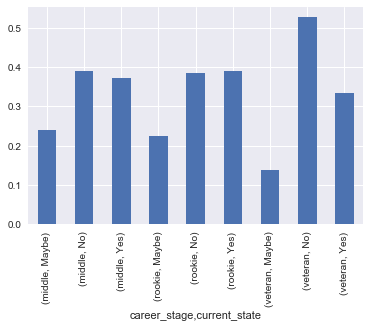

In [777]:
group_stage_current = df.groupby(['career_stage', 'current_state'])
print(group_stage_current.size())
current_percentage = group_stage_current.size() / group_stage.size()
current_percentage.plot(kind='bar')

People are reporting mental illness essentially the same way over the career.

## Gender

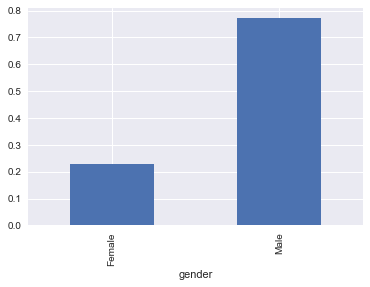

In [778]:
df_group_gender = df.groupby('gender')

# lets see what percentage of employees in tech are female (SPOILER: IT'S NOT VERY HIGH)
workforce = df_group_gender.age.count() / len(df)
ax = workforce.plot(kind='bar')

What do you ya know... Its really small

gender  past_history
Female  Maybe            34
        No               56
        Yes             154
Male    Maybe           141
        No              309
        Yes             371
dtype: int64


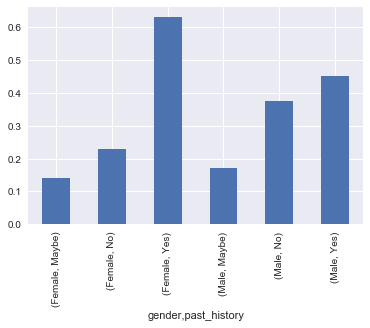

In [779]:
group_gender_history = df.groupby(['gender', 'past_history'])
print(group_gender_history.size())
past_percentage = group_gender_history.size() / df_group_gender.size()
past = past_percentage.plot(kind='bar')

gender  current_state
Female  Maybe             42
        No                73
        Yes              129
Male    Maybe            199
        No               349
        Yes              273
dtype: int64


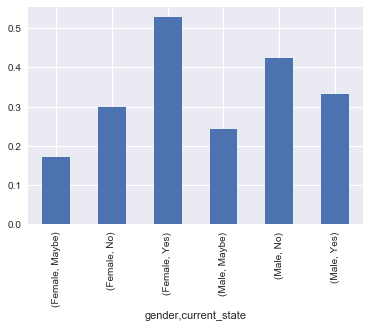

In [783]:
group_gender_current = df.groupby(['gender', 'current_state'])
print(group_gender_current.size())
current_percentage_gender = group_gender_current.size() / df_group_gender.size()
current = current_percentage_gender.plot(kind='bar')

Women appear to have a higher probability of having a mental illness

## Family history

family_history
I don't know    196
No              377
Yes             492
dtype: int64


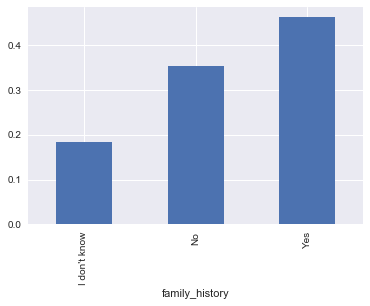

In [782]:
group_family = df.groupby('family_history')
print(group_family.size())
family_percent = group_family.age.count() / len(df)
ax = family_percent.plot(kind='bar')

family_history  past_history
I don't know    Maybe            57
                No               56
                Yes              83
No              Maybe            47
                No              236
                Yes              94
Yes             Maybe            71
                No               73
                Yes             348
dtype: int64


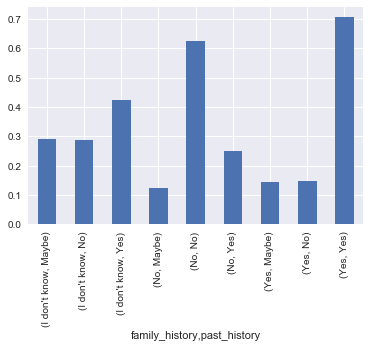

In [785]:
group_family_history = df.groupby(['family_history', 'past_history'])
print(group_family_history.size())
past_percentage = group_family_history.size() / group_family.size()
past_percentage.plot(kind='bar')


family_history  current_state
I don't know    Maybe             74
                No                58
                Yes               64
No              Maybe             65
                No               245
                Yes               67
Yes             Maybe            102
                No               119
                Yes              271
dtype: int64


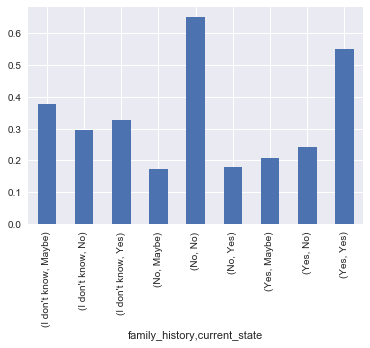

In [784]:
group_family_current = df.groupby(['family_history', 'current_state'])
print(group_family_current.size())
current_percentage = group_family_current.size() / group_family.size()
current = current_percentage.plot(kind='bar')

Looks like a family history is a pretty good indicator of a persons mental health reporting.

## Lets see if people get treatment when they have reported mental illness

In [788]:
ill = df[(df.past_history == 'Yes') | (df.current_state == 'Yes')]

In [795]:
ill.groupby('treatment').size()

treatment
False     66
True     501
dtype: int64

Well that's good, people go get treatment

In [796]:
fixed = df[(df.past_history != 'No') & (df.current_state == 'No')]
fixed.groupby('treatment').size()

treatment
False    41
True     82
dtype: int64

And if a person got better, they've probably gotten treatment

## location

In [953]:
group_location = df.groupby('work_location')
group_location.size().sort_values(ascending=False)

work_location
United States of America    664
United Kingdom              125
Canada                       54
Germany                      39
Netherlands                  28
Australia                    25
Sweden                       14
France                       10
Brazil                        9
Ireland                       9
Russia                        9
India                         7
New Zealand                   6
Bulgaria                      6
Finland                       5
Switzerland                   5
Denmark                       4
South Africa                  4
Italy                         3
Chile                         3
Belgium                       3
Norway                        3
Colombia                      2
Estonia                       2
Mexico                        2
Bosnia and Herzegovina        2
Israel                        2
Pakistan                      2
Poland                        2
Spain                         2
Bangladesh                

Lets just look at places with more than 10 responses

In [854]:
filtered_locations = group_location.filter(lambda x: len(x) >= 10)

In [859]:
filtered_locations.groupby(['work_location', 'employer_awareness']).size()

work_location             employer_awareness
Australia                 I don't know            3
                          No                     14
                          Yes                     8
Canada                    I don't know            6
                          No                     37
                          Yes                    11
France                    I don't know            1
                          No                      7
                          Yes                     2
Germany                   I don't know            3
                          No                     28
                          Yes                     8
Netherlands               No                     23
                          Yes                     5
Sweden                    I don't know            3
                          No                      9
                          Yes                     2
United Kingdom            I don't know            8
                   

current_state                                Maybe   No  Yes
work_location            employer_awareness                 
Australia                I don't know            1    1    1
                         No                      1    7    6
                         Yes                     1    2    5
Canada                   I don't know            1    3    2
                         No                      7   19   11
                         Yes                     4    6    1
France                   I don't know            0    1    0
                         No                      0    6    1
                         Yes                     0    2    0
Germany                  I don't know            0    2    1
                         No                     10   15    3
                         Yes                     3    4    1
Netherlands              No                      3   10   10
                         Yes                     0    3    2
Sweden                  

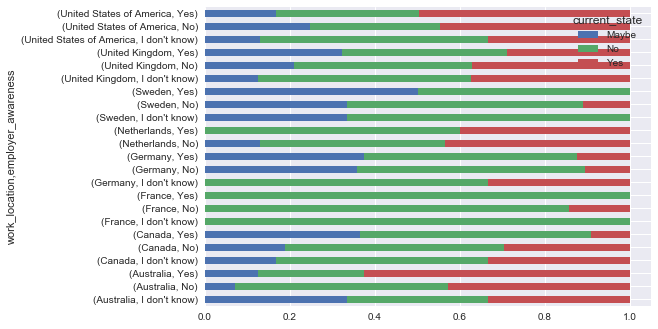

In [872]:
ill = pd.crosstab([filtered_locations['work_location'],
                        filtered_locations['employer_awareness']], 
                       filtered_locations.current_state)
print(ill)

rate = ill.div(ill.sum(1).astype(float),
                             axis=0) # normalize the value
rate.plot(kind='barh', 
                   stacked=True)

treatment                                    False  True 
work_location            employer_awareness              
Australia                I don't know            0      2
                         No                      1      8
                         Yes                     0      6
Canada                   I don't know            0      2
                         No                      1     15
                         Yes                     0      1
France                   No                      1      1
Germany                  I don't know            0      1
                         No                      1      9
                         Yes                     1      1
Netherlands              No                      1     12
                         Yes                     1      2
Sweden                   No                      1      3
United Kingdom           I don't know            1      4
                         No                      8     34
              

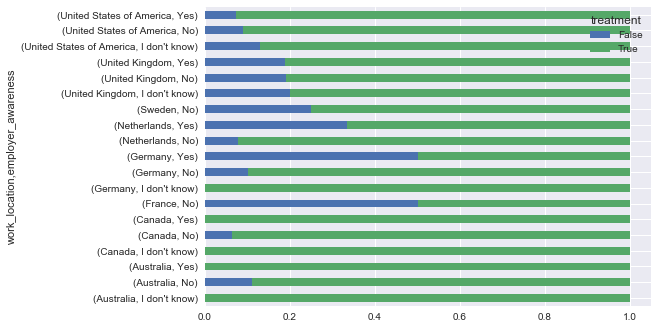

In [876]:
filtered_locations_ill = filtered_locations[(filtered_locations.current_state == 'Yes') | 
                                            (filtered_locations.past_history == 'Yes')]
ill = pd.crosstab([filtered_locations_ill['work_location'],
                        filtered_locations_ill['employer_awareness']], 
                       filtered_locations_ill.treatment)
print(ill)

rate = ill.div(ill.sum(1).astype(float),
                             axis=0) # normalize the value
rate.plot(kind='barh', 
                   stacked=True)

## Company Size

current_state                           Maybe           No           Yes     \
past_history                            Maybe No Yes Maybe  No Yes Maybe No   
work_location            num_employees                                        
Australia                1-5                0  0   0     1   1   0     0  0   
                         100-500            0  1   1     0   1   0     0  0   
                         26-100             0  0   0     0   2   1     0  0   
                         500-1000           0  0   1     0   0   1     0  0   
                         6-25               0  0   0     0   2   0     0  1   
                         More than 1000     0  0   0     0   0   1     0  0   
Canada                   1-5                0  1   1     0   1   2     0  0   
                         100-500            3  0   1     1   1   0     0  0   
                         26-100             5  0   0     1   5   0     0  2   
                         500-1000           0  0   0

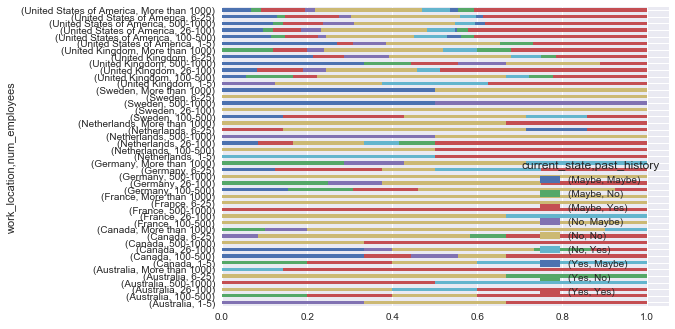

In [955]:
ill = pd.crosstab([filtered_locations['work_location'],
                        filtered_locations['num_employees']], 
                       [filtered_locations.current_state, filtered_locations.past_history])
print(ill)

rate = ill.div(ill.sum(1).astype(float),
                             axis=0) # normalize the value
rate.plot(kind='barh', 
                   stacked=True)

In [954]:
df[(df.current_state == 'Maybe') & (df.past_history == 'No')]

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote
27,35,Male,Germany,Germany,large,No,No,No,Maybe,1,Never
37,29,Male,United Kingdom,United Kingdom,large,No,No,No,Maybe,0,Never
110,31,Male,United States of America,United States of America,large,No,No,No,Maybe,0,Sometimes
120,30,Male,United Kingdom,United Kingdom,very large,No,Yes,No,Maybe,0,Sometimes
136,31,Male,United States of America,United States of America,medium,No,No,No,Maybe,1,Sometimes
167,40,Male,United Kingdom,United Kingdom,giant,No,I don't know,No,Maybe,0,Never
169,36,Male,Germany,Germany,giant,Yes,No,No,Maybe,0,Sometimes
170,25,Male,Germany,Germany,medium,No,No,No,Maybe,0,Never
343,31,Male,Germany,Germany,large,No,No,No,Maybe,1,Never
346,23,Male,Italy,Italy,giant,No,I don't know,No,Maybe,0,Never
